In [1]:
import pandas as pd

# Series

Là mảng 1 chiều với tên cột và giá trị tại các hàng

In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

Series tương tự với mảng một nhiều narray trong numpy  
Có thể dùng series làm tham số trong các hàm của array

In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [4]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [5]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [7]:
s * 100

0    200
1   -100
2    300
3    500
dtype: int64

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index Labels

In [10]:
s2 = pd.Series([68,83,112,68], index = ["alice", "bob","charles","darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [11]:
s2["bob"]

83

Để làm rõ khi nào bạn truy cập vị trí theo nhãn và khi nào truy cập theo chỉ số, ta dùng thuộc tính loc và iloc

In [12]:
s2.loc["darwin"]

68

In [13]:
s2.iloc[3]

68

dùng được với Slice

In [14]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

Có thể tạo một series từ dict

In [18]:
weight = {"alice":68, "bob": 83,"colin":86, "darwin":68}
s3 = pd.Series(weight)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

Có thể kiểm soát yếu tố mình muốn đưa vào dựa vào các chỉ mục mong muốn

In [19]:
s4 = pd.Series(weight, index = ["colin","alice"])
s4

colin    86
alice    68
dtype: int64

pandas hỗ trợ liên kết tự động trong series  
khi một phép tính liên quan đến nhiều đối tượng Series, pandas sẽ tự động liên kết các mục bằng cách khớp các nhãn chỉ mục

In [21]:
print(s2.keys())

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')


In [22]:
print(s3.keys())

Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


In [25]:
s2  * s3

alice      4624.0
bob        6889.0
charles       NaN
colin         NaN
darwin     4624.0
dtype: float64

Ta cũng có thể khởi tạo một Series bằng một số vô hướng và một list index label  
tất cả các items sẽ được đặt bằng số vô hướng đó

In [26]:
meaning = pd.Series(42,["life", "universe","everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

đặt tên cho Series

In [27]:
s6 = pd.Series([83,68], index = ["bob", "alice"], name = "weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Handling time

Tạo một time series  với data_range(). Các tham số như sau:  
- start: ngày bắt đầu
- end: ngày kết thúc
- periods: số lượng mốc thời gian cần tạo. Chỉ cần chỉ định một trong hai tham số end hoặc periods
- freq : tần số của các mốc thời gian. Một số giá trị phổ biến:  
    'D' : hàng ngày
    'W' : hàng tuần
    'M' : hàng tháng
    'H' : hàng giờ
    'min' : hàng phút
    'S' : hàng giây


In [32]:
dates = pd.date_range('2026/10/29 5:30pm', periods= 12, freq = 'h')
dates

DatetimeIndex(['2026-10-29 17:30:00', '2026-10-29 18:30:00',
               '2026-10-29 19:30:00', '2026-10-29 20:30:00',
               '2026-10-29 21:30:00', '2026-10-29 22:30:00',
               '2026-10-29 23:30:00', '2026-10-30 00:30:00',
               '2026-10-30 01:30:00', '2026-10-30 02:30:00',
               '2026-10-30 03:30:00', '2026-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='h')

In [33]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
temp_series = pd.Series(temperatures, dates)
temp_series

2026-10-29 17:30:00    4.4
2026-10-29 18:30:00    5.1
2026-10-29 19:30:00    6.1
2026-10-29 20:30:00    6.2
2026-10-29 21:30:00    6.1
2026-10-29 22:30:00    6.1
2026-10-29 23:30:00    5.7
2026-10-30 00:30:00    5.2
2026-10-30 01:30:00    4.7
2026-10-30 02:30:00    4.1
2026-10-30 03:30:00    3.9
2026-10-30 04:30:00    3.5
Freq: h, dtype: float64

<Axes: >

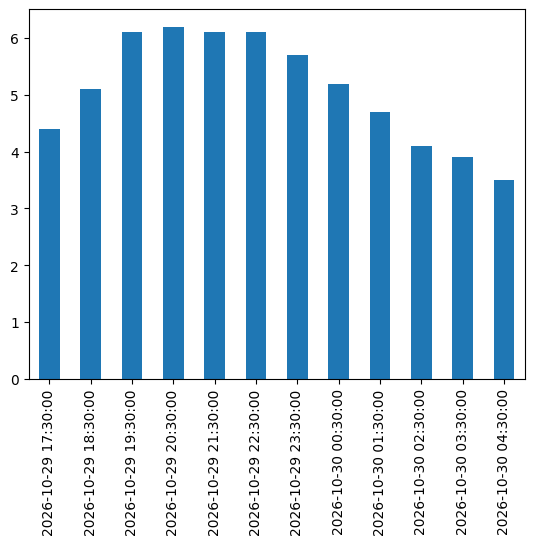

In [37]:
import matplotlib.pyplot as plt
temp_series.plot(kind = 'bar')

# DataFrame

ta có thể xem DataFrame là một từ điển của các Series

In [38]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [39]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [40]:
people[["birthyear","hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


Có thể tạo một DataFrame từ một narray hoặc từ một list of list

In [42]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
    values,
    columns= ["birthyear", "children","hobby","weight"],
    index = ["alice","bob","charles"]
)
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


tạo DataFrame từ một dict

In [43]:
people = pd.DataFrame({
    "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice": "Biking", "bob": "Dancing"},
    "weight": {"alice": 68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Transposing

In [44]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [45]:
people.T

,alice,bob,charles
birthyear,1985,1984,1992
hobby,Biking,Dancing,NaN
weight,68,83,112
children,NaN,3.0,0.0


## Stacking and unstacking

In [47]:
d7 = people.stack()
d7

alice    birthyear       1985
         hobby         Biking
         weight            68
bob      birthyear       1984
         hobby        Dancing
         weight            83
         children         3.0
charles  birthyear       1992
         weight           112
         children         0.0
dtype: object

In [49]:
d8 = d7.unstack()
d8

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Truy cập hàng

In [50]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [51]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [53]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [55]:
people[np.array([True,False,True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [56]:
people[people["birthyear"]<1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


## Adding and removing columns

In [57]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [58]:
people["age"] = 2018 - people["birthyear"] # thêm vào một cột "Age" mới
people["over 30"] = people["age"] > 30


In [59]:
people

,birthyear,hobby,weight,children,age,over 30
alice,1985,Biking,68,NaN,33,True
bob,1984,Dancing,83,3.0,34,True
charles,1992,NaN,112,0.0,26,False


xoá cột

In [60]:
people.pop("birthyear")

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [61]:
del people["children"]

In [62]:
people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


khi thêm một cột mới thì cột đó phải có cùng số hàng, các hàng bị thiếu sẽ được điền giá trị NaN, hàng mới thì bỏ qua

In [ ]:
people["pets"] = pd.Series({"bob":0,"charles":5,"eugene":1}) # alice bị điền NaN và eugene bị bỏ qua
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


thêm cột mới bằng insert()

In [65]:
people.insert(1, "height", [172,181,185])

Có thể thêm cột mới bằng phương thức assign()  
phương thức này trả về một dataframe mới

In [66]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## Đánh giá một biểu thức

In [67]:
people.eval("weight / (height/100) ** 2 >25")

alice      False
bob         True
charles     True
dtype: bool

## Truy vấn một DataFrame

In [68]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets
bob,Dancing,181,83,34,True,0.0


## Sắp xếp một dataFrame

### Sắp xếp theo label

In [69]:
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


In [70]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets
charles,NaN,185,112,26,False,5.0
bob,Dancing,181,83,34,True,0.0
alice,Biking,172,68,33,True,NaN


In [71]:
people.sort_index(axis = 0)

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


### Sắp xếp theo giá trị

In [72]:
people.sort_values(by = "age")

,hobby,height,weight,age,over 30,pets
charles,NaN,185,112,26,False,5.0
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0


## Operation on DataFrame

In [73]:
grades_array = np.array([[8,8,9],[10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array,index = ["alice","bob","charles","darwin"], columns=["sep","oct","nov"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


có thể sử dụng các hàm toán học trong numpy

In [74]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [75]:
np.log(grades)

,sep,oct,nov
alice,2.079442,2.079442,2.197225
bob,2.302585,2.197225,2.197225
charles,1.386294,2.079442,0.693147
darwin,2.197225,2.302585,2.302585


In [76]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


In [77]:
grades >=5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


phương thức all() xem xét điều kiện trên cả cột, chỉ trả về True khi cả cột đó thoả mãn điều kiện

In [78]:
(grades >5).all()

sep    False
oct     True
nov    False
dtype: bool

sử dụng phương thức all() theo hàng

In [79]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

tương tự với phương thứuc any()

In [80]:
(grades == 10).any(axis=1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

In [81]:
grades - grades.mean()

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


In [82]:
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob", "colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [83]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


## Handling missing data

In [84]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [ ]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Xử lý dữ liệu bị thiếu bằng cách nội suy bằng phương thức interpolate

In [86]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [87]:
bonus_points.interpolate(axis = 1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Bob đã có 0 điểm thưởng vào tháng 10 và 2 vào tháng 12. Khi chúng tôi nội suy vào tháng 11, chúng tôi sẽ nhận được trung bình: 1 điểm thưởng. Colin đã có 1 điểm thưởng vào tháng 11, nhưng chúng tôi không biết anh ấy có bao nhiêu điểm thưởng vào tháng 9, vì vậy chúng tôi không thể nội suy, đây là lý do tại sao vẫn còn một giá trị còn thiếu trong tháng 10 sau khi nội suy. Để khắc phục điều này, chúng tôi có thể đặt điểm thưởng tháng 9 thành 0 trước khi nội suy.

In [88]:
better_bonus_points = bonus_points.copy()

In [89]:
better_bonus_points.insert(0,"sep",0)

In [90]:
better_bonus_points.loc["alice"] = 0

In [93]:
better_bonus_points = better_bonus_points.interpolate(axis = 1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [95]:
final = grades + better_bonus_points
final

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


xoá các hàng và cột có tất cả các phần từ NaN

In [98]:
final = final.dropna(how = 'all')
final

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
darwin,NaN,11.0,10.0,9.0


In [99]:
final = final.dropna(axis = 1, how = 'all')
final

,nov,oct,sep
alice,9.0,8.0,8.0
bob,10.0,9.0,10.0
charles,5.0,11.0,4.0
darwin,11.0,10.0,9.0


## kết hợp với groupby()

In [101]:
final["hobby"] = ["Biking", "Dancing", "Dancing", "Biking"]
final

,nov,oct,sep,hobby
alice,9.0,8.0,8.0,Biking
bob,10.0,9.0,10.0,Dancing
charles,5.0,11.0,4.0,Dancing
darwin,11.0,10.0,9.0,Biking


In [103]:
grouped_grades = final.groupby("hobby")
grouped_grades

In [104]:
grouped_grades.mean()

,nov,oct,sep
hobby,,,
Biking,10.0,9.0,8.5
Dancing,7.5,10.0,7.0


## overview function

In [105]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3, "some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


In [106]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


In [107]:
large_df.tail()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


In [108]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

In [109]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


## Saving and loading

In [110]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby", "weight", "birthyear", "children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


### Saving

In [111]:
my_df.to_csv("my_df.csv")

### Loading

In [112]:
my = pd.read_csv("my_df.csv")
my

,Unnamed: 0,hobby,weight,birthyear,children
0,alice,Biking,68.5,1985,NaN
1,bob,Dancing,83.1,1984,3.0


## Combining DataFrame

sử dụng phương thức merge() 

In [113]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [114]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


Inner Join  
- Inner Join chỉ trả về các bản ghi mà có sự tương ứng (match) giữa các bảng dựa trên điều kiện join. 
- Nếu một hàng ở bảng A không có hàng tương ứng ở bảng B theo điều kiện, hàng đó sẽ không xuất hiện trong kết quả.

In [ ]:
pd.merge(left = city_loc, right= city_pop, on="city") # mặc định how là inner

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


Full Outer Join (Full Join):  
- Trả về tất cả các bản ghi khi có sự tương ứng trong bảng bên trái hoặc bảng bên phải. 
- Nếu không có sự tương ứng, các cột tương ứng sẽ chứa NULL.

In [116]:
pd.merge(left = city_loc, right = city_pop, on = "city", how = "outer")

,state_x,city,lat,lng,population,state_y
0,OH,Cleveland,41.473508,-81.739791,NaN,NaN
1,NaN,Houston,NaN,NaN,2242193.0,Texas
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,NY,New York,40.705649,-74.008344,8363710.0,New-York
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,CA,San Francisco,37.781334,-122.416728,808976.0,California


Left Outer Join (Left Join):  
- Trả về tất cả các bản ghi từ bảng bên trái (left table) và các bản ghi tương ứng từ bảng bên phải (right table). 
- Nếu không có dữ liệu tương ứng ở bảng bên phải, kết quả sẽ chứa giá trị NULL ở các cột của bảng bên phải.

In [117]:
pd.merge(left = city_loc, right = city_pop, on = "city", how = "left")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN


Right Outer Join (Right Join):  
- Tương tự như Left Join, nhưng trả về tất cả các bản ghi từ bảng bên phải và các bản ghi tương ứng từ bảng bên trái.
- Nếu không có dữ liệu ở bảng bên trái, giá trị NULL sẽ được đưa vào.

In [118]:
pd.merge(left = city_loc, right = city_pop, on = "city", how = "right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


Nếu như mà tên của các cột đều khác nhau, ta phải dùng left_on và right_on

In [119]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## Concatenation

không nối bằng join, chỉ đơn giản là kết hợp các df bằng concat()

In [120]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


Khi mà các cột ở dataframe này ko xuất hiện ở dataframe còn lại, nó sẽ điền NaN vào  
Dùng join = "inner" để trả về những cột xuất hiện ở cả 2 dataframe

In [121]:
pd.concat([city_loc,city_pop], join = "inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


kết hợp các dataframe theo phương ngang thì để axis = 1

In [122]:
pd.concat([city_loc,city_pop], axis = 1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In [123]:
pd.concat([city_loc,city_pop], axis = 1, join = "inner")

,state,city,lat,lng,population,city,state
3,OH,Cleveland,41.473508,-81.739791,808976,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710,New York,New-York


## Categories

Khá thường xuyên để có các giá trị đại diện cho các loại, ví dụ 1 cho nữ và 2 cho nam, hoặc "A" cho tốt ", B" trung bình, "C" cho xấu. Các giá trị phân loại này có thể khó đọc và cồng kềnh để xử lý, nhưng may mắn thay, gấu trúc làm cho nó dễ dàng.

In [124]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


tạo một nhãn dựa trên eco_code

In [125]:
city_eco['economy'] = pd.Categorical(
    city_eco['eco_code'].map({17: 'Banking', 20: 'Energy', 34: 'Tourism'})
)
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Banking
4,8363710,New York,New-York,17,Banking
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


lấy list categorical column

In [126]:
city_eco['economy'].cat.categories

Index(['Banking', 'Energy', 'Tourism'], dtype='object')

In [127]:
# đổi tên categories
city_eco['economy'] = city_eco['economy'].cat.rename_categories({'Banking': 'Finance'})
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
